Linear regression theory
- linear regression is considered a supervised learning algorithm
- supervised learning algorithms experience a dataset containing features but each example is also associated with a label or target
- supervised learning involves observing several examples of a random feature vector x and an associated target value or vector y, and learning to predict y from x
- the term supervised learning originates from the view of the target y being provided by an instructor or teacher who shows the machine learning system what to do

- linear regression solves a regression problem
- the goal is to build a system that can take a vector x ∈ Rn as input (independent variable) and predict the value of a scalar y ∈ R as its ouput (dependent variable)
- y is continious
- the output is a linear function of the input and can be represented as follows:
    - h(x) = theta0 + sum(thetai*xi)
- h(x) being the output function (sometimes called hypothesis), theta being the parameters and x the features
- if there is only one feature we speak of simple linear regression otherwise multiple linear regression
- parameters are values that control the behaviour of the system
- thetai is the coefficient that we multiply by features xi before summing up the contributions from all the features
- we can think of thetai as a set of weights that determine how each feature affects the prediction and theta0 an intercept term that enables the function not to pass through the origin
- this intercept is often called the bias parameter
- this terminology derives from the point of view that the output of the transformation is biased toward being theta0 in the absence of any input (different from the idea of a statistical bias)
- with this terminology the above function is also often represented as:
    - yhat = sum(wi*xi) + b
- technically speaking with the addition of the intercept term b this is called an affine function not a linear function but in machine learning the term linear function is commonly used

- to achieve the task of predicting y from x we need to choose the parameters such that yhat = y
- for this first we need a way to measure the performance of the algorithm
- a common way of measuring the performance in linear regression is by using the mean squared error function as a cost function
    - J(w, b) = 1/m 1/2 sum(yhati - yi)**2
- intuitively we can see that this error measure decreases to 0 when yhat = y and grows exponentially whenever the euclidean distance between them increases
- note that large differences between yhat and y lead to even larger contributions to the loss due to its quadratic form
- this can encourage the model to to avoid large errors (but also lead to excessive sensitivity to anomalous data)
- on a side note you might often see the term cost function and loss function used interchangeably
- a key distinction lies in their scope
- A loss function quantifies the error of a model's prediction for a single data point, while a cost function aggregates the losses across the entire training dataset. Essentially, the cost function is the average of the loss function over the training data
- so the corresponding loss function (squared error function) is defined as follows:
    - L(w, b) = 1/2 (yhati - yi)**2
- where L is the per-example loss
- the constant 1/2 doesn't have a special meaning and is put there for convenience to make the math simpler since it cancels out when taking the derivative
- since the loss function is the measure of performance for the machine learning algorithm it is intuitive to minimize this function to get a smaller loss
- like already mentioned we need to find parameters w and b that minimize the loss
- for this the loss function has to be differentiable
    - argmin w,b L(w, b)

- one way to find the optimal parameters is to use the gradient descent algorithm
- gradient descent is a first-order optimization algorithm and is commonly used in ML-algorithms
- the gradient is the generalization of the derivative to functions that depend on one or more variables 
- we find the gradient of the loss function with respect to the parameters by varying one variable at a time and keeping the others constant
- the gradient is then a collection of these partial derivatives with respect to the parameters wi and b
- the gradient points in the direction of the steepest ascent (to the local maximum)
- to find a local minimum of a function using gradient descent one starts with random values for the paramaters (commonly initialized as zeros or with a guassian distribution) and takes steps proportional to the negative of the gradient of the function at the current point
- in the case of a multivariate function it is useful to imagine a surface described by the loss function and a ball starting at a particular location (starting parameters)
- when the ball is released it will move downhill in the direction of steepest descent

- a recurring problem in machine learning is that large training sets are necessary for good generalization but computing the gradient on these large training sets can be very time consuming
- the cost function as already mentioned decomposes as a sum over training examples of some per-example loss function
- with stardard gradient descent optimization is performed using the full training set
    - g = 1/m sum(nabla L(w, b)) 
- so in practice we must pass over the entire training set before making a single update, even if the update steps might be very powerful
- even worse if there is a lot of redundancy in the training data, the benefit of a full update is limited
- however, often it is possible to find a "cheap" approximation of the gradient
- approximating the gradient is still useful as long as it points roughly in the same direction as the true gradient
- the insight of stochastic gradient descent (SGD) is that the gradient is an expectation
- the expectation may be approximately estimated using a small set of samples
- in an extreme variation we may consider only a single example at a time and take update steps based on one observation at a time
- this can be an effective strategy but also has computational and statistical drawbacks
- One problem arises from the fact that processors are a lot faster multiplying and adding numbers than they are at moving data from main memory to processor cache. It is up to an order of magnitude more efficient to perform a matrix–vector multiplication than a corresponding number of vector–vector operations. This means that it can take a lot longer to process one sample at a time compared to a full batch
- on the other hand a smaller set of samples (one in the extreme) can introduce more noise to the approximation and act as a regularization effect
- the solution the these problems is to use the minibatch stochastic gradient descent algorithm
- rather than taking a full batch or only a single sample at a time we take a minibatch of observations B = {x1, ... , xm'} drawn uniformly from the training set, with m' being the size of the minibatch
- m' is usually held fixed as the training set size m grows
- a number between 32 and 256 is a good start for the choice of the size of the said minibatch
- the estimate of the gradient is formed as
    - g = 1/m' sum(nabla L(w, b))
- for the squared error as the loss function the gradients are computed with application of the chain rule as follows
    - L(w, b) = 1/2 (w * xi + b - yi)**2
    - nabla L(w) = outer derivative * inner derivative = (w * xi + b - yi) * xi
    - nabla L(b) = outer derivative * inner derivative = (w * xi + b - yi) * 1 = w * xi + b - yi
    - g = 1/m' sum((w * xi + b - yi) * xi)
    - g = 1/m' sum( w * xi + b - yi)
- to make an update to the parameters of the model we need to multiply the gradients by a small predetermined positive value eta, called the learning rate, and subtract the resulting term from the current parameter values
    - w, b = w, b - eta g

- commonly the training is done in epochs
- an epoch represents a full pass over the entire training set and since we want to output the cost of the model over the entire epoch we need to normalize the minibiatch losses by the number of minibatches
- After training for some predetermined number of iterations (or until some other stopping criterion is met), we record the estimated model parameters
- finally the trained model can be used to make predictions on new unseen examples
- to test how the model performs on unseen data the dataset is usually split in a training and a test set
- like already mentioned the training set is used for model training (finding the optimal parameters)
- the test set on the other hand is never used for training and is unseen by the model until it is used to make predictions after the training
- it is also a common practive to split the training set further into a training set and a validation set which is used between epochs to evaluate the model performance while training
- this way decisions can be made on the fly mid training and this can be especcially useful when the training takes a lot of time

## Linear Regression Theory

Linear regression is a **supervised learning algorithm**. In supervised learning, the algorithm is trained on a dataset that includes both input features and corresponding output labels or target values.

More specifically, supervised learning involves observing several examples of a random feature vector **x** along with an associated target value or vector **y**, and learning a mapping from **x** to **y**. The goal is to enable the model to predict the target **y** for new, unseen instances of **x**.

The term *supervised* arises from the idea that the correct output **y** is provided by an instructor or a "teacher", guiding the learning process. This guidance helps the machine learning model understand what output it should produce for a given input.

## Linear Regression Model

Linear regression is used to solve a **regression problem**, where the aim is to predict a continuous output value.

The goal is to build a system that can take a feature vector **x** ∈ ℝⁿ as input (independent variables) and predict a scalar value **y** ∈ ℝ as output (dependent variable). The output **y** is **continuous**.

The model assumes that the output is a **linear function** of the input features. This relationship can be expressed as:

$$
h(x) = \theta_0 + \sum_{i=1}^{n} \theta_i x_i
$$

Here:
- $h(x)$ is the predicted output (also referred to as the **hypothesis**),
- $\theta_0$ is the **intercept** term (also called the **bias**),
- $\theta_i$ are the **coefficients** or **weights**, and
- $x_i$ are the input features.

If there is only **one feature**, the model is called **simple linear regression**. If there are **multiple features**, it is referred to as **multiple linear regression**.

The parameters $\theta_i$ control how the input features affect the output prediction. Each coefficient $\theta_i$ determines the weight or contribution of the corresponding feature $x_i$. The term $\theta_0$ (bias) allows the model to make predictions that do not necessarily pass through the origin.

This **bias parameter** is called so because it represents the model’s prediction in the absence of any input, i.e., when all features are zero. This notion of "bias" is different from **statistical bias**.

With this terminology, the function is often rewritten as:

$$
\hat{y} = \sum_{i=1}^{n} w_i x_i + b
$$

Technically, because of the bias term $b$, this is known as an **affine function**, not a purely linear function. However, in machine learning, the term **linear function** is commonly used to describe it.

## Loss and Cost Functions in Linear Regression

To successfully predict the target value $y$ from input $x$, we need to choose the parameters such that the predicted value $\hat{y}$ closely matches $y$.

To do this, we first need a way to **measure the performance** of the model. In linear regression, a common way to evaluate performance is by using the **mean squared error (MSE)** as a **cost function**:

$$
J(w, b) = \frac{1}{m} \cdot \frac{1}{2} \sum_{i=1}^{m} \left( \hat{y}_i - y_i \right)^2
$$

This cost function measures the average squared difference between predicted values $\hat{y}_i$ and actual target values $y_i$ over the dataset.

Intuitively:
- The error becomes **zero** when $\hat{y} = y$.
- The error **increases quadratically** as the Euclidean distance between $\hat{y}$ and $y$ increases.
- Larger differences between predicted and actual values result in **even larger contributions to the total error** due to the squared term.

This quadratic nature encourages the model to avoid large errors, although it can also lead to **excessive sensitivity to outliers or anomalous data**.

> 💡 **Note:** The terms *cost function* and *loss function* are often used interchangeably, but they have different scopes:
> - A **loss function** measures the error for a **single training example**.
> - A **cost function** is typically the **average of the loss function** over the entire training set.

The corresponding **loss function** (also known as the **squared error loss**) is defined as:

$$
L(w, b) = \frac{1}{2} \left( \hat{y}_i - y_i \right)^2
$$

The factor $\frac{1}{2}$ is included for **mathematical convenience**—it simplifies the derivative during optimization but does not affect the outcome of training.

Since the loss function quantifies the performance of the model, it is intuitive to **minimize** it to achieve better predictions. Therefore, the training process aims to find the parameters $w$ and $b$ that **minimize the loss**:

$$
\arg\min_{w, b} L(w, b)
$$

For this optimization to be feasible, the loss function must be **differentiable**, allowing us to use gradient-based optimization methods.

## Gradient Descent for Linear Regression

One effective method for finding the optimal parameters in linear regression is the **gradient descent algorithm**. Gradient descent is a **first-order optimization algorithm** and is widely used in many machine learning models.

### What Is the Gradient?

The **gradient** is a generalization of the derivative for functions that depend on **multiple variables**. To compute the gradient of the loss function with respect to the parameters, we calculate the **partial derivatives** of the function with respect to each parameter—varying one variable at a time while keeping the others constant.

The gradient is a **vector** composed of these partial derivatives:

$$ 
\nabla L(w, b) = \left[ \frac{\partial L}{\partial w_1}, \frac{\partial L}{\partial w_2}, \dots, \frac{\partial L}{\partial w_n}, \frac{\partial L}{\partial b} \right]
$$

This gradient vector points in the direction of the **steepest ascent** of the loss function. However, since our goal is to **minimize** the loss, we move in the direction **opposite** to the gradient.

### Gradient Descent Algorithm

To minimize the loss function using gradient descent:
1. Start with random initial values for the parameters $w$ and $b$ (these can be initialized as zeros or sampled from a Gaussian distribution).
2. Iteratively update the parameters by taking small steps in the opposite direction of the gradient:

$$
w := w - \eta \cdot \frac{\partial L}{\partial w}, \quad b := b - \eta \cdot \frac{\partial L}{\partial b}
$$

Where:
- $\eta$ is the **learning rate**, a small positive number that controls the step size.

### Intuition

You can imagine the loss function as a surface in high-dimensional space. The optimization process is like a ball placed somewhere on this surface (representing the current parameter values). When released, the ball **rolls downhill** following the path of **steepest descent** until it reaches a **local minimum**.

This process continues until the algorithm **converges**—i.e., until changes in the loss or parameters become negligible.

## Mini-Batch Stochastic Gradient Descent (SGD)

A recurring challenge in machine learning is the trade-off between training efficiency and generalization. Large training sets are often essential for good generalization performance. However, computing the gradient on such large datasets can be extremely time-consuming.

### Full-Batch Gradient Descent

As previously discussed, the cost function can be decomposed as a **sum over individual loss functions** for each training example. Standard gradient descent performs optimization using the **entire training set**:

$$
g = \frac{1}{m} \sum_{i=1}^{m} \nabla L(w, b)
$$

This means we must iterate over the entire dataset before updating the parameters — even if the computed update is significant. The situation becomes worse when the training data contains redundancy, since computing the full gradient provides diminishing returns in such cases.

### Stochastic Gradient Descent (SGD)

To overcome this inefficiency, we can use **stochastic gradient descent (SGD)**. The key insight behind SGD is recognizing that the gradient of the cost function is an **expectation**, and expectations can be estimated using only a **subset** of the data.

In its most extreme form, SGD performs updates based on a **single training example at a time**. While this introduces noise, it still provides a usable approximation of the full gradient. In fact, this noisy update can act as a form of **regularization**, helping to avoid overfitting.

However, updating based on a single example has its drawbacks:
- It can be computationally inefficient. Processors handle **matrix–vector operations** far more efficiently than repeated **vector–vector operations**.
- Excessive noise in the gradient estimates can hinder convergence stability.

### Mini-Batch SGD

The practical solution to these problems is **mini-batch stochastic gradient descent**. Instead of using the full dataset or just one sample, we use a **mini-batch** of samples:

- Let $B = \{x_1, x_2, \dots, x_{m'}\}$ be a mini-batch drawn uniformly from the training set.
- $m'$ is the **mini-batch size**, typically fixed as the training set grows.
- Good values for $m'$ are often in the range **32 to 256**.

The mini-batch estimate of the gradient is:

$$
g = \frac{1}{m'} \sum_{i=1}^{m'} \nabla L(w, b)
$$

### Computing the Gradient for Squared Error Loss

Given the loss function:

$$
L(w, b) = \frac{1}{2}(w \cdot x_i + b - y_i)^2
$$

The gradients are computed using the **chain rule**:

- Gradient with respect to $w$:

$$
\nabla_w L = (w \cdot x_i + b - y_i) \cdot x_i
$$

- Gradient with respect to $b$:

$$
\nabla_b L = (w \cdot x_i + b - y_i)
$$

- The average gradients over the mini-batch:

$$
g_w = \frac{1}{m'} \sum_{i=1}^{m'} (w \cdot x_i + b - y_i) \cdot x_i
$$

$$
g_b = \frac{1}{m'} \sum_{i=1}^{m'} (w \cdot x_i + b - y_i)
$$

### Parameter Update Rule

To update the model parameters, we multiply the gradients by a small positive scalar $\eta$, called the **learning rate**, and subtract the result from the current values:

$$
w := w - \eta \cdot g_w, \quad b := b - \eta \cdot g_b
$$

## Training Procedure and Evaluation

Training a linear regression model typically involves multiple **epochs**.

- An **epoch** refers to a full pass over the entire training dataset.
- During each epoch, the dataset is divided into **mini-batches**, and each mini-batch is used to compute gradients and update the model parameters.
- To monitor the overall training performance, we compute the **average loss per epoch**, which requires normalizing the accumulated mini-batch losses by the number of mini-batches.

After training for a **predetermined number of epochs**, or until a **stopping criterion** (like convergence or early stopping) is met, we record the learned parameters of the model.

### Making Predictions

Once the model is trained, it can be used to make predictions on **new, unseen data**. However, to evaluate how well the model generalizes beyond the data it was trained on, we need to test it on a **separate dataset**.

### Dataset Splitting

To accurately assess the model’s performance, the dataset is typically split into:

- **Training set**: Used to train the model and find optimal parameters.
- **Test set**: Held back during training. It is only used after training to evaluate the model’s generalization performance.

In practice, it is also common to introduce a third dataset:

- **Validation set**: A portion of the training data that is set aside and not used directly for updating model parameters.
  - The validation set is used **between epochs** to monitor the model's performance and make decisions such as:
    - Adjusting hyperparameters
    - Implementing early stopping
    - Selecting the best model checkpoint

This is especially useful when training is time-consuming, as it allows for **on-the-fly adjustments** to improve model performance and efficiency.


## Linear regression implementation from scratch


Required imports:

In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

- we are going to use the california housing dataset
- it is a suitable dataset for multiple linear regression problems
- read the description for more information about the dataset

In [97]:
housing_sklearn = fetch_california_housing(as_frame=True)
print(housing_sklearn.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

- load the dataset as a pandas dataframe to get access to some useful pandas commands

In [98]:
housing: pd.DataFrame= housing_sklearn.frame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


- all features are numeric so there is no conversion needed
- there are no missing feature values

In [99]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [100]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


- here we can see the correlations between the features (and the target)

Text(0.5, 1.0, 'California Housing')

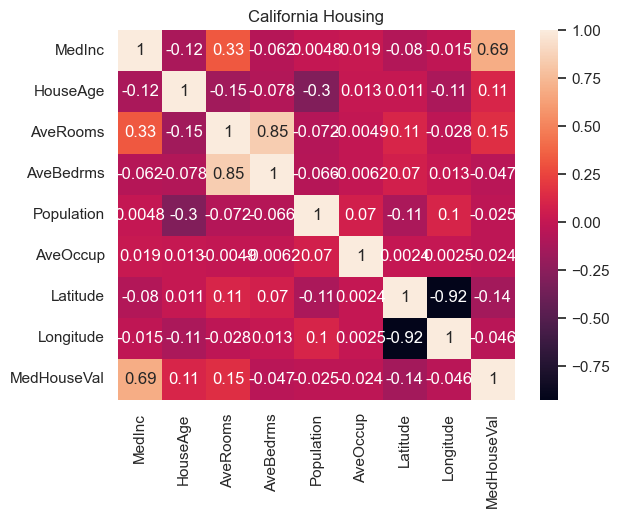

In [101]:
sns.heatmap(housing.corr(), annot=True).set_title('California Housing')

- split the dataset in features and target

In [102]:
X = housing.drop("MedHouseVal", axis=1)
y = housing["MedHouseVal"]

In [103]:
X = X.to_numpy()
y = y.to_numpy()

- you can also directly load the dataset as X and y numpy arrays

In [104]:
X, y = fetch_california_housing(return_X_y=True)

- set the hyperparameters
- you can also set the seed for numpy random functions, so you always get the same random outcomes

In [105]:
# np.random.seed(42)

epochs = 100
batch_size = 32
eta = 0.1
val_split = 0.1
split_ratio = 0.75
feature_dim = X.shape[1]

- through shuffling we can avoid introducing a bias to the model if the dataset is sorted in some kind of way (by target for example)
- in this case it is not, but it is still very useful to ensure that the training, validation and test sets are more representative of the overall data distribution
- this helps the model to generalize better to unseen data

In [106]:
def shuffle_data(X, y):
    shuffle_indices = np.random.permutation(len(X))
    X, y = X[shuffle_indices], y[shuffle_indices]

    return X, y

In [107]:
X, y = shuffle_data(X, y)

- we split the dataset into training and test sets

In [108]:
def split_dataset(X, y, data_split):
    split_size = int(len(X) * data_split)
    X_train = X[:split_size]
    y_train = y[:split_size]
    X_test = X[split_size:]
    y_test = y[split_size:]

    return X_train, y_train, X_test, y_test

In [109]:
X_train, y_train, X_test, y_test = split_dataset(X, y, split_ratio)

- normalizing the data can be very useful 

In [110]:
class MinMaxScaler:
    def fit_transform(self, data):
        self.min_data = min(data)
        self.max_data = max(data)
        
        return (data - self.min_data) / (self.max_data - self.min_data)
    
    def fit(self, data):
        return (data - self.min_data) / (self.max_data - self.min_data)

In [111]:
def min_max_normalize(X_train, X_test):
    X_train_transpose = X_train.transpose()
    X_test_transpose = X_test.transpose()
    
    for i in range(len(X_train_transpose)):
        scaler = MinMaxScaler()
        X_train_transpose[i, :] = scaler.fit_transform(X_train_transpose[i, :])
        X_test_transpose[i, :] = scaler.fit(X_test_transpose[i, :])
        
    return X_train_transpose.transpose(), X_test_transpose.transpose()

In [112]:
X_train, X_test = min_max_normalize(X_train, X_test)

In [113]:
class Loss:
    def mean_loss(self, y_true: np.ndarray, y_pred: np.ndarray) -> float:
        losses: np.ndarray = self(y_true, y_pred)
        mean_loss = np.sum(losses) / len(losses)

        return mean_loss

In [114]:
class MSE(Loss):   
    def __call__(self, y_true: np.ndarray, y_pred: np.ndarray) -> np.ndarray:       
        losses = (y_pred - y_true)**2 / 2
        return losses
    
    def gradient(self, y_true: np.ndarray, y_pred: np.ndarray, X: np.ndarray) -> tuple[np.ndarray, float]:      
        grad_w = ((y_pred - y_true).dot(X)) / len(X)
        grad_b = np.sum((y_pred - y_true)) / len(X)
        return grad_w, grad_b

In [115]:
class LinRModule:
    def __init__(self):
        self.loss = MSE()
    
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int, batch_size: int = 32, eta: float = 0.01, val_split: float = None):
        if val_split:
                split_size = int(len(X) * val_split)
                X_val = X[:split_size]
                y_val = y[:split_size]
                X = X[split_size:]
                y = y[split_size:]
    
        batches = [(X[i : i + batch_size], y[i : i + batch_size]) for i in range(0, len(X), batch_size)]
        
        losses = []
        val_losses = []
        for i in range(epochs):
            loss = 0
            for X_batch, y_true in batches:
                y_pred = self(X_batch)
                loss += self.loss.mean_loss(y_true, y_pred)
                grad_w, grad_b = self.loss.gradient(y_true, y_pred, X_batch)
                self.w -= eta * grad_w
                self.b -= eta * grad_b

            if val_split:
                y_pred_val = self(X_val)
                val_loss = self.loss.mean_loss(y_val, y_pred_val)
                print(f"Epoch {i}: Loss {loss/len(batches)}, Val-Loss {val_loss}")
                val_losses.append(val_loss)
            else:
                print(f"Epoch {i}: Loss {loss/len(batches)}")
                
            losses.append(loss/len(batches))

        return losses, val_losses

    def predict(self, X: np.ndarray):
        y_pred = self(X)
        
        return y_pred

    
    def evaluate(self, y_pred: np.ndarray, y_true: np.ndarray) -> tuple:
        mae = np.sum(np.abs(y_true - y_pred)) / len(y_true)
        mse = np.sum((y_true - y_pred)**2) / len(y_true)
        rmse = np.sqrt(np.sum((y_true - y_pred)**2) / len(y_true))
        r2 = 1 - (np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2))
        
        return mae, mse, rmse, r2

In [116]:
class LinRModel(LinRModule):
    def __init__(self, feature_dim: int):
        super().__init__()
        self.w: np.ndarray = np.random.normal(size=(feature_dim))
        self.b: np.ndarray = np.random.normal(size=1)
        
    def __call__(self, X: np.ndarray) -> np.ndarray:
        y_pred = np.dot(X, self.w) + self.b
               
        return y_pred

In [117]:
model = LinRModel(feature_dim)
history, val_history = model.fit(X_train, y_train, epochs, batch_size, eta, val_split)

Epoch 0: Loss 0.5724107724097035, Val-Loss 0.3533211557192558
Epoch 1: Loss 0.3523418415112119, Val-Loss 0.2820761565922452
Epoch 2: Loss 0.30753440067545545, Val-Loss 0.26487499674266035
Epoch 3: Loss 0.29474009867728684, Val-Loss 0.2594094573264722
Epoch 4: Loss 0.28964909215086987, Val-Loss 0.25653712883362
Epoch 5: Loss 0.2866721707996415, Val-Loss 0.25436534292045937
Epoch 6: Loss 0.2844747227836634, Val-Loss 0.2525253636945888
Epoch 7: Loss 0.28270049349497356, Val-Loss 0.25094229645221117
Epoch 8: Loss 0.28122589934558323, Val-Loss 0.24958688246165536
Epoch 9: Loss 0.2799883018073685, Val-Loss 0.24843300674449953
Epoch 10: Loss 0.2789451791901334, Val-Loss 0.24745411028992625
Epoch 11: Loss 0.27806354281801793, Val-Loss 0.24662486621328603
Epoch 12: Loss 0.2773165717782144, Val-Loss 0.24592242974377732
Epoch 13: Loss 0.2766821161686874, Val-Loss 0.24532687487640928
Epoch 14: Loss 0.2761417807864716, Val-Loss 0.24482114922237225
Epoch 15: Loss 0.2756802531153343, Val-Loss 0.24439

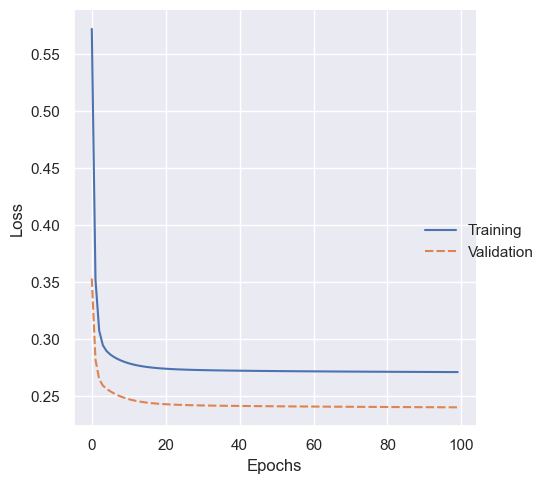

In [118]:
plot = sns.relplot(data=(history, val_history), kind="line")
plt.xlabel("Epochs")
plt.ylabel("Loss")
new_labels = ['Training', 'Validation']
for texts, labels in zip(plot._legend.texts, new_labels):
    texts.set_text(labels)

In [119]:
y_pred = model.predict(X_test)
mae, mse, rmse, r2 = model.evaluate(y_pred, y_test)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.5431660776402759
MSE: 0.5422486327941002
RMSE: 0.7363753341836622
R2: 0.5872657065335114
